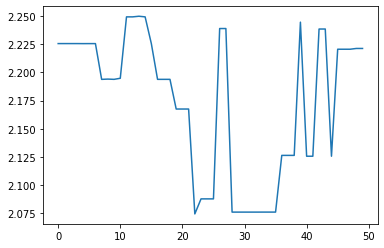

In [5]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
#import numpy as np

S=10 #dimensiunea populatiei
capatStanga=-1 #domeniul de definitie
capatDreapta=2
a=-1
b=1
c=2 #coeficientii fitnesului
precizie=6
pRecomb=0.25
pMutatie=0.01
pasi=50
cuElemElitist = 0
necesitaPrint = 1

fprint = open("Evolutie.txt", "w")



def BinarySearch(v,left,right,target):

    if right>left:
        mid=(right+left)//2
        if v[mid]==target or (v[mid]<target and v[mid+1]>target and mid<len(v)):
            return mid
        elif v[mid]>target:
            return BinarySearch(v,left,mid-1,target)
        else:
            return BinarySearch(v,mid+1,right,target)
    elif right==left:
        return left
    else:
        return -1

class Individ:

    def __init__(self,valoare = None):

        self.a = a
        self.b = b
        self.c = c
        self.precizie = precizie
        self.pSelectie = 0
        self.lenCromozom = math.log2((capatDreapta - capatStanga) * (10 ** precizie)) #(log in baza 2)((b-a)*(10^precizie))

        if self.lenCromozom != int(self.lenCromozom):
            self.lenCromozom = int(self.lenCromozom)+1  #aproximarea la parte intreaga superioara

        if valoare == None:
            self.valoare = round(random.uniform(capatStanga,capatDreapta), precizie) ###AICI TREBUIE SA VERIFIC CU EXCLUSIV/INCLUSIV
        else:
            self.valoare = valoare

        self.fitness = self.a * (self.valoare * self.valoare) + (self.b * self.valoare) + self.c

        ##########CODIFICARE
        self.chromosome = ""
        addZero = ""
        x = ""
        nr = round((self.valoare-capatStanga)*(10**self.precizie)) #(value-a)*(10^p)
        x = bin(nr)
        x = str(x)
        x = x[2:]  # pentru ca aveam ab01000 etc
        concat = self.lenCromozom - len(x)  # cati de 0 mai am de pus in fata
        while concat > 0:
            addZero = addZero + "0"
            concat -= 1
        self.chromosome = addZero + x

    def actualizeaza_fitness(self):

        if self.valoare > capatDreapta:
            self.fitness = 0
        else:
            self.fitness = self.a * (self.valoare * self.valoare) + (self.b * self.valoare) + self.c

    def __repr__(self):
        return f"({self.valoare},{self.chromosome},{self.fitness})"


def decodify(chromosome):

    p = precizie
    power=1
    while p>0:
        power = power * 10
        p-=1
    x = round(int(chromosome, 2)/power+capatStanga, precizie)
    return x

def obtineIndivid(chromosome):

    val = decodify(chromosome)
    individ = Individ(val)
    individ.actualizeaza_fitness()

    return individ


def selectie(intervalSelectie, generatieInitiala,criteriuElitist):

    generatieDupaSelectie =[]

    if criteriuElitist == 1:
        nrSelecteazaIndivid = S-1
    else:
        nrSelecteazaIndivid = S

    for i in range(nrSelecteazaIndivid):

        u = random.uniform(0, 1)
        index = BinarySearch(intervalSelectie,0,len(intervalSelectie)-1, u)  # este numarand din 0

        if index == S:

            cromozom = generatieInitiala[index-1].chromosome
            individ = obtineIndivid(cromozom)
            generatieDupaSelectie.append(individ)
            if necesitaPrint == 1:
                fprint.write("\n")
                fprint.write("u=" + str(u)+ "cromozomul: "+ str(index))

        else:
            cromozom = generatieInitiala[index].chromosome
            individ = obtineIndivid(cromozom)
            generatieDupaSelectie.append(individ)
            if necesitaPrint == 1:
                fprint.write("u=" +str(u)+ "cromozomul: "+ str(index + 1))

    return generatieDupaSelectie

def participaRecombinare(generatieDupaSelectie):

    indiviziParticipaLaRecombinare = []
    i=1
    nuParticipaLaRecombinare = []

    for individ in generatieDupaSelectie:
        u = random.uniform(0, 1)
        tuplu = ()
        aux = []
        if u<pRecomb:

            if necesitaPrint == 1:
                fprint.write(str(i) + ":" + individ.chromosome +  "u= " + str(u) + "<" + str(pRecomb) + "participa")
                fprint.write("\n")
            #print(individ)
            aux = [individ.chromosome,i-1]
            tuplu = tuple(aux)
            indiviziParticipaLaRecombinare.append(tuplu) #salvez cromozomii care participa la recombinare

        else:
            if necesitaPrint == 1:
                fprint.write(str(i) + ":" + individ.chromosome + "u= " + str(u))
                fprint.write("\n")
            #print(individ)
            nuParticipaLaRecombinare.append(i-1)
        i+=1

    return (indiviziParticipaLaRecombinare,nuParticipaLaRecombinare)



def CrossOver(indiviziParticipaLaRecombinare,nuParticipaLaRecombinare,generatieDupaSelectie):

    cromozomiDupaRecombinare = []
    cromozom = ""

    if len(indiviziParticipaLaRecombinare) == 1 : #daca am un singur cromozom acesta nu se modifica

        i = len(indiviziParticipaLaRecombinare)
        if necesitaPrint == 1:
            fprint.write("Cromozomul" + str(indiviziParticipaLaRecombinare[0][1]+1) +  "nu se modifica")
            fprint.write("\n")
        cromozom = indiviziParticipaLaRecombinare[0][0]
        individ = obtineIndivid(cromozom)
        individ.actualizeaza_fitness()
        cromozomiDupaRecombinare.insert(indiviziParticipaLaRecombinare[0][1], individ)

    elif len(indiviziParticipaLaRecombinare) %2 == 1 and len(indiviziParticipaLaRecombinare) >1: #il las pe primul in pace si il inserez

        i=1
        cromozom = indiviziParticipaLaRecombinare[0][0]
        individ = obtineIndivid(cromozom)
        individ.actualizeaza_fitness()
        cromozomiDupaRecombinare.insert(indiviziParticipaLaRecombinare[0][1], individ)

    else:
        i=0

    while i<len(indiviziParticipaLaRecombinare): #iau cate un tuplu pe rand

        sir1 = ""
        sir2 = ""
        breakPoint = random.randint(0, len(indiviziParticipaLaRecombinare[i][0]))

        if necesitaPrint == 1:
            fprint.write("\n")
            fprint.write("Recombinare dintre cromozomul: " + str(indiviziParticipaLaRecombinare[i][1]+1)+ " cu cromozomul "+ str(indiviziParticipaLaRecombinare[i+1][1]+1) +":")
            fprint.write("\n")
        for indexGena in range(breakPoint):
            # primul element din tuplul[i] cu primul element din tuplul[i+1]

            if indiviziParticipaLaRecombinare[i][0][indexGena] != indiviziParticipaLaRecombinare[i + 1][0][indexGena]:

                if indiviziParticipaLaRecombinare[i][0][indexGena] == "0":
                    sir1 += "1"
                    sir2 += "0"

                else:
                    sir1 += "0"
                    sir2 += "1"

            else:

                sir1 += indiviziParticipaLaRecombinare[i][0][indexGena]
                sir2 += indiviziParticipaLaRecombinare[i][0][indexGena]

        sir1 += indiviziParticipaLaRecombinare[i][0][breakPoint:]
        sir2 += indiviziParticipaLaRecombinare[i + 1][0][breakPoint:]

        if necesitaPrint == 1:
            fprint.write(str(indiviziParticipaLaRecombinare[i][0])+ " "+ str(indiviziParticipaLaRecombinare[i + 1][0])+ " punct  "+str( breakPoint))
            fprint.write("\n")
            fprint.write("Rezultat "+ sir1+ " "+ sir2)
            fprint.write("\n")

        individ1 = obtineIndivid(sir1)
        individ1.actualizeaza_fitness()
        cromozomiDupaRecombinare.insert(indiviziParticipaLaRecombinare[i][1], individ1)

        individ2 = obtineIndivid(sir2)
        individ2.actualizeaza_fitness()
        cromozomiDupaRecombinare.insert(indiviziParticipaLaRecombinare[i+1][1], individ2)

        i = i + 2


    #acum pentru cei care nu participa
    for i in nuParticipaLaRecombinare:

        #print("i:",i)
        '''
        cromozom = generatieDupaSelectie[i].chromosome
        individ1 = obtineIndivid(cromozom)
        individ1.actualizeaza_fitness()
        '''
        cromozomiDupaRecombinare.insert(i,generatieDupaSelectie[i])

    return cromozomiDupaRecombinare

def mutatii(cromozomiDupaRecombinare):

    i = 1
    cromozomiModificati = []
    cromozomiDupaMutatii = []

    for individ in cromozomiDupaRecombinare:

        sir1 = ""
        modificat = 0
        for indexGena in range(len(individ.chromosome)):

            u = random.uniform(0, 1)
            if u < pMutatie:

                modificat = 1
                if individ.chromosome[indexGena] == "0":

                    sir1 += "1"
                else:

                    sir1 += "0"
            else:

                sir1 += individ.chromosome[indexGena]

        individ1 = obtineIndivid(sir1)
        individ1.actualizeaza_fitness()
        cromozomiDupaMutatii.append(individ1)

        if modificat == 1:
            cromozomiModificati.append(i)

        i += 1

    return (cromozomiDupaMutatii,cromozomiModificati)
##############################MAIN############################
pas = 1
maximFitness = []
fprint.write("Populatia initiala: ")
fprint.write("\n")
generatiaUrmatoare = []

while pas <= pasi:

    #print("\nPas: ",pas)
    maxi = capatStanga
    cromozomElemElitist = ""
    fitnessSum = 0

    if pas == 1:

        generatieInitiala = []


        for i in range(S):

            individ = Individ()
            fprint.write(str(i+1)+":"+ individ.chromosome+ " x= "+ str(individ.valoare)+ " f= "+ str(individ.fitness))
            fprint.write("\n")
            fitnessSum += individ.fitness
            if individ.fitness > maxi:

                maxi = individ.fitness
                cromozomElemElitist = individ.chromosome

            generatieInitiala.append(individ)

        elementElitist = obtineIndivid(cromozomElemElitist)
        if cuElemElitist == 1:
            generatiaUrmatoare.append(elementElitist)
        maximFitness.append(maxi)

    else:

        #print("Generatia urmatoare",generatiaUrmatoare)
        generatieInitiala = []
        for individ in generatiaUrmatoare:

            individ1 = obtineIndivid(individ.chromosome)
            individ1.actualizeaza_fitness()
            generatieInitiala.append(individ1)
            fitnessSum += individ.fitness

            if individ.fitness > maxi:
                maxi = individ.fitness
                cromozomElemElitist = individ.chromosome

        maximFitness.append(maxi)
        generatiaUrmatoare = []

        #print("Generatia initiala: ")
        i=1
        #for individ in generatieInitiala:
        #    print(i + 1, ":", individ.chromosome, " x= ", individ.valoare, " f= ", individ.fitness)

        elementElitist = obtineIndivid(cromozomElemElitist)

        if cuElemElitist == 1:
            generatiaUrmatoare.append(elementElitist)



    sumProbabilitati = 0
    intervalSelectie = []

    if necesitaPrint == 1:
        fprint.write("\nProbabilitati selectie")
        fprint.write("\n")

    i=1
    for individ in generatieInitiala:

        individ.pSelectie = individ.fitness/fitnessSum
        sumProbabilitati += individ.pSelectie #calculez sumele partiale
        intervalSelectie.append(sumProbabilitati)
        if necesitaPrint == 1:
            fprint.write("cromozom "+ str(i)+ " probabilitate "+ str(individ.pSelectie))
            fprint.write("\n")
        i+=1

    amAdaugatZero = 0
    if intervalSelectie[0] != 0:
        amAdaugatZero = 1
        intervalSelectie.insert(0, 0)

    intervalSelectie[len(intervalSelectie)-1] = 1

    if necesitaPrint == 1:
        fprint.write("\n")
        fprint.write("Intervale probabilitati selectie: ")
        fprint.write("\n")
        fprint.write(str(intervalSelectie))

        #print("Generatie initiala",generatieInitiala)

    generatieDupaSelectie = []
    if cuElemElitist == 1:
        generatieDupaSelectie = selectie(intervalSelectie,generatieInitiala,criteriuElitist=1)
    else:
        generatieDupaSelectie = selectie(intervalSelectie, generatieInitiala, criteriuElitist=0)

    if necesitaPrint == 1:
        fprint.write("\nDupa selectie: ")
        fprint.write("\n")
        i = 1
        for individ in generatieDupaSelectie:
            fprint.write(str(i)+ ": "+ individ.chromosome+ " x= "+ str(individ.valoare)+ " f= "+ str(individ.fitness))
            fprint.write("\n")
            #print(individ)
            i += 1

        fprint.write("\nProbabilitatea de incrucisare "+ str(pRecomb))
        fprint.write("\n")


    indiviziParticipaLaRecombinare = []
    nuParticipaLaRecombinare = []

    indiviziParticipaLaRecombinare,nuParticipaLaRecombinare = participaRecombinare(generatieDupaSelectie)
    #nuParticipaLaRecombinare = participaRecombinare(generatieDupaSelectie)[1]
    '''
    print("Nu participa la recombinare: ", nuParticipaLaRecombinare)
    for individ in indiviziParticipaLaRecombinare:
        print(individ)
    '''
    cromozomiDupaRecombinare = []
    cromozomiDupaRecombinare = CrossOver(indiviziParticipaLaRecombinare,nuParticipaLaRecombinare,generatieDupaSelectie)

    if necesitaPrint == 1:
        fprint.write("\nDupa recombinare:")
        fprint.write("\n")
        i=1
        for individ in cromozomiDupaRecombinare:

            fprint.write(str(i)+ ":"+ individ.chromosome+ " x= "+ str(individ.valoare) +" f= "+ str(individ.fitness))
            fprint.write("\n")
            i += 1

        fprint.write("\nProbabilitatea de mutatie pentru fiecare gena "+ str(pMutatie))
        fprint.write("\n")
        fprint.write("Au fost modificati cromozomii:")
        fprint.write("\n")

    cromozomiDupaMutatii = []
    cromozomiModificati = []

    cromozomiDupaMutatii,cromozomiModificati = mutatii(cromozomiDupaRecombinare)

    if necesitaPrint == 1:
        for i in cromozomiModificati:
            fprint.write(str(i))
            fprint.write("\n")

        i = 1

    if necesitaPrint == 1:
        fprint.write("Dupa mutatie")
        fprint.write("\n")
    for individ in cromozomiDupaMutatii:
        if necesitaPrint == 1:
            fprint.write(str(i) +":"+ individ.chromosome+ " x= "+ str(individ.valoare)+ " f= "+ str(individ.fitness))
            fprint.write("\n")

        individ1 = obtineIndivid(individ.chromosome)
        individ1.actualizeaza_fitness()
        generatiaUrmatoare.append(individ1)
        i += 1

    necesitaPrint = 0
    pas += 1

#print(maximFitness)
for j in maximFitness:
    fprint.write(str(j))
    fprint.write("\n")

ypoints = np.array(maximFitness)
xpoints = np.array(range(0,len(maximFitness)))

plt.plot(xpoints, ypoints)
plt.show()
